len 3387
[0.        0.476929  0.5124186 ... 0.9476664 0.966117  0.8950772]
amin 0


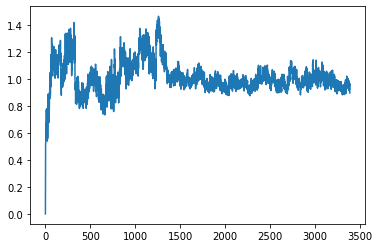

In [1]:
import mdtraj as md
import numpy as np
traj = md.load('seg.dcd', top='structure_bound.psf')                                      
#xray_init = md.load('xray_init.pdb', top='xray_init.psf')                                      
rmsds = md.rmsd(traj, traj, 0)     
print('len', len(rmsds))
print(rmsds)
print('amin', np.argmin(rmsds))

#top.select("protein and (backbone or resname ALA)")
#traj_westpa

from matplotlib import pyplot as pl
pl.plot(rmsds)

/home/bizon/anaconda3/envs/westpa-dev/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:718: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


Text(0, 0.5, 'RMSD ($\\AA$)')

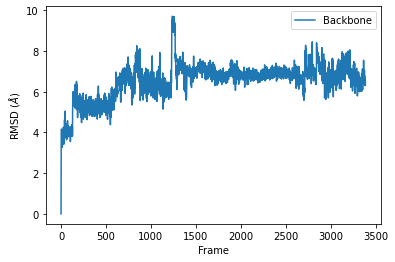

In [4]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, CRD
from MDAnalysis.analysis import rms

import pandas as pd
# the next line is necessary to display plots in Jupyter
%matplotlib inline

u = mda.Universe('structure_bound.psf', 'seg.dcd')
u_CA = u.select_atoms('(segid A and name CA)')

R = rms.RMSD(u_CA,  # universe to align
             u_CA,  # reference universe or atomgroup
             ref_frame=0,# frame index of the reference
            )  
R.run()
df = pd.DataFrame(R.rmsd,
                  columns=['Frame', 'Time (ns)',
                           'Backbone'])

ax = df.plot(x='Frame', y=['Backbone'],
             kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

In [59]:
# helical analysis
from MDAnalysis.analysis import helix_analysis as hel
print(mda.__version__)
print(hel.__file__)
traj = u.trajectory[0]
u_A = u.select_atoms('segid A')
print('frames in traj: ', len(u.trajectory))
#h = hel.HELANAL(u_A, select='name CA',
#                ref_axis=[0, 0, 1]).run()
h = hel.HELANAL(u, select='segid A and name CA',
             verbose=True).run()



2.2.0
/home/bizon/anaconda3/envs/westpa-dev/lib/python3.10/site-packages/MDAnalysis/analysis/helix_analysis.py
frames in traj:  3387


  0%|          | 0/3387 [00:00<?, ?it/s]

In [61]:

#print(h[3300])
print(h.results.summary).keys()


#print(h.results.summary)


{'local_twists': {'mean': array([133.06840625,  99.64181001, 155.92996222, 108.41153398,
       103.84940881, 100.52401275,  96.77466223, 130.78351284,
       127.39999833, 131.94875987, 136.01703276, 111.36496611,
        99.1465209 , 113.93540411, 118.80730649, 122.23046634,
       133.87442457, 115.56535029, 143.5501119 , 121.65460957,
       100.13447473, 130.80627628, 103.84278641, 133.393916  ,
       117.59424376, 103.2736791 , 101.43412386,  98.76569571,
        97.11136156,  98.33515427, 100.17346324,  99.24033915,
       100.14441122,  99.47103095,  97.32903252,  99.31199386,
       109.38054625,  97.40297477, 121.30916974, 106.25992973,
       126.37654023, 127.86944077, 129.29969361, 124.07837895,
       104.33024487, 132.82339781, 133.51500052, 131.69554524,
        99.73359432,  97.30519443, 100.23624408,  98.93345449,
        99.14358507, 100.55147868,  98.29733908,  99.56860668,
        98.63950678, 100.12244744,  98.09766057, 102.83840684,
       100.93490302,  96.9019

AttributeError: 'NoneType' object has no attribute 'keys'

In [63]:
print(h.results['local_twists'].shape)

(3387, 145)


(145,)
(145,)


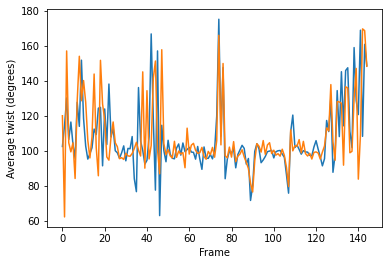

In [66]:
%matplotlib inline
def plotTraj(h, fr=0):
    #pl.figure(fr)
    hres = h.results
    print(hres['local_twists'][fr].shape)
    #print(hsum['local_twists'])
    pl.plot(hres['local_twists'][fr])
    pl.xlabel('Frame')
    pl.ylabel('Average twist (degrees)');

plotTraj(h, fr=0)
plotTraj(h, fr=3380)



In [64]:
ls

dist_bound.txt  min.xml     run_md.py  structure_bound.psf
dist.py*        README.md   seg.dcd    xray_run.zip
eq.xml          rmsd.ipynb  seg.log


In [2]:
#import pytraj as pt
import mdtraj as md
#import pytraj as pt
import nglview as nv

print("nglview version = {}".format(nv.__version__))
#print("pytraj version = {}".format(pt.__version__))

#'bstate.psf', 
#traj = traj
view = nv.show_mdtraj(traj)
view

nglview version = 1.1.7


NGLWidget(count=3387)

In [28]:
view.render_image()
view._display_image()

In [6]:
from IPython.display import IFrame

IFrame(src="view.html", width=700, height=700)